<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    FIT-HCMUS, VNU-HCM 
    <br>
    Introduction To Data Science 
    <br>
    Final project 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Data exploration 📌
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/processed/processed_fb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4571 non-null   object 
 1   Position       4571 non-null   object 
 2   PreferredFoot  4571 non-null   object 
 3   Season         4571 non-null   object 
 4   Age            4571 non-null   int64  
 5   Squad          4571 non-null   object 
 6   Country        4571 non-null   object 
 7   Comp           4571 non-null   object 
 8   LgRank         4571 non-null   int64  
 9   MP             4571 non-null   int64  
 10  Starts         4571 non-null   int64  
 11  Min            4571 non-null   int64  
 12  90s            4571 non-null   float64
 13  Gls            4571 non-null   int64  
 14  Ast            4571 non-null   int64  
 15  G+A            4571 non-null   int64  
 16  G-PK           4571 non-null   int64  
 17  PK             4571 non-null   int64  
 18  PKatt   

# Basic level

## What is the distribution of the data in each column?

## Categorial data

### Analyzing Positon

In [3]:
# Get Name and Postion data
# When merging there is some duplicate rows because some players have more than 1 injuries in 1 season
position = df[['Name', 'Position']].drop_duplicates()
position.describe()

,Name,Position
count,389,389
unique,389,3
top,William Saliba,DF
freq,1,172


- It can be observed that the dataset comprises 430 players.
- Furthermore, throughout various seasons, the positions of players on the field remain consistent.

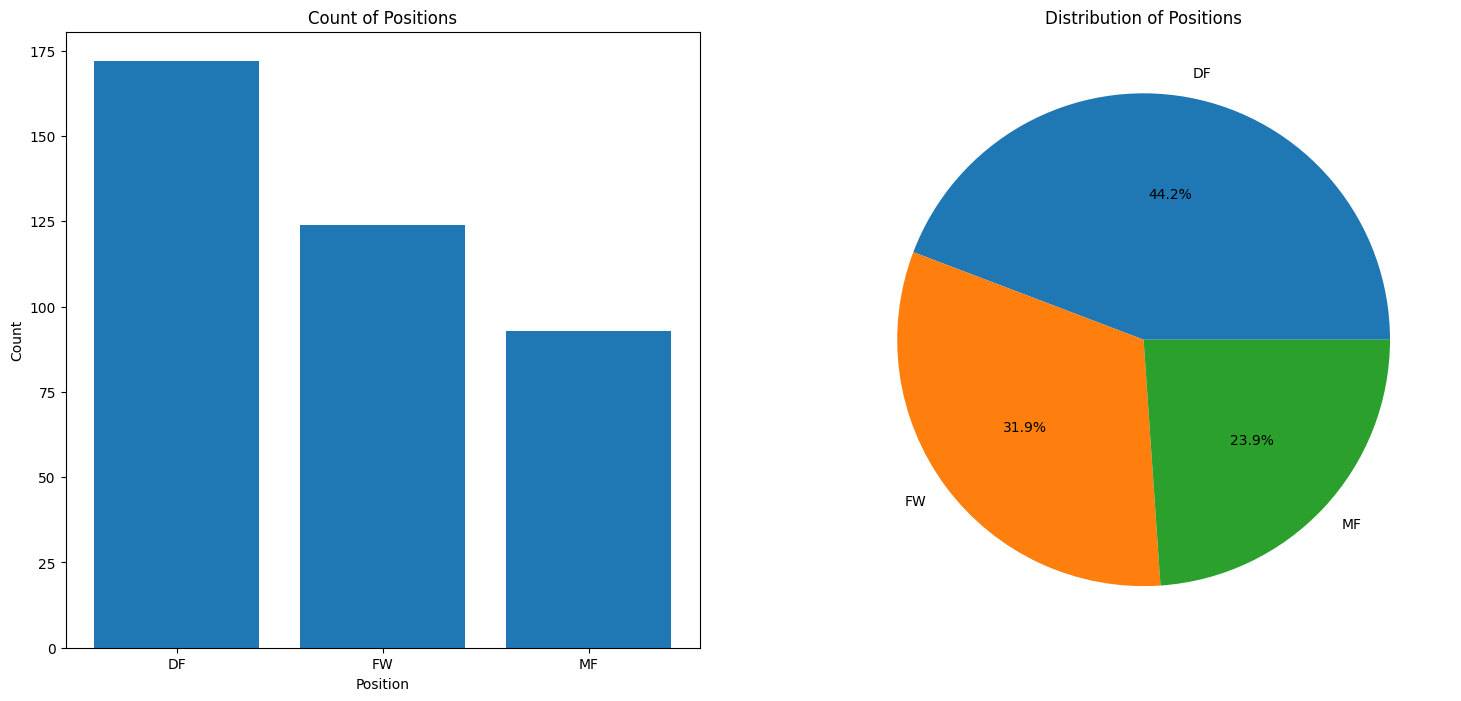

In [4]:
# Display the count and distribution of each unique value in the 'Position' column
position_count = position['Position'].value_counts() # Get distribution of each unique value in Position

# Visualize data
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].bar(position_count.index, position_count.values)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Positions')

axes[1].pie(position_count.values, labels = position_count.index, autopct='%1.1f%%', startangle=0)
axes[1].set_title('Distribution of Positions')
plt.show()

- It can be noted that:
    - Among the 430 players, they are distributed across positions such as DF (Defender), FW (Forward), MF (Midfielder).
    - Specifically, the most prevalent position is DF (44.2%), followed by FW (31.9%), with MF holding the lowest proportion (23.9%).

### Analyzing PreferredFoot

In [5]:
# Get Name and PreferredFoot data
# When merging there is some duplicate rows because some players have more than 1 injuries in 1 season
preferred_foot = df[['Name', 'PreferredFoot']].drop_duplicates()
preferred_foot.describe()

,Name,PreferredFoot
count,389,389
unique,389,3
top,William Saliba,Right
freq,1,276


- It can be observed that, throughout various seasons, the preferred kicking foot of players on the field also remains unchanged.

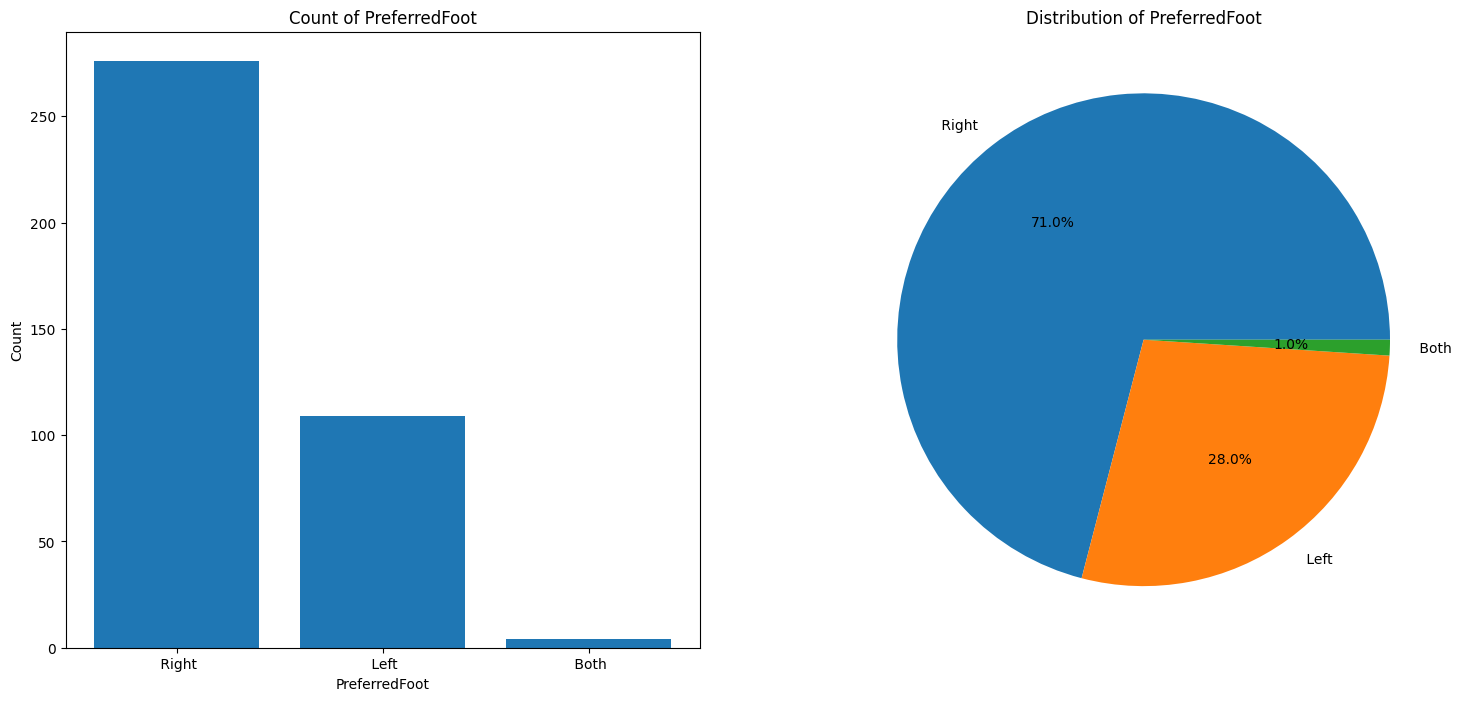

In [6]:
# Display the count and distribution of each unique value in the 'PreferredFoot' column
preferred_foot_count = preferred_foot['PreferredFoot'].value_counts() # Get distribution of each unique value in PreferredFoot

# Visualize data
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].bar(preferred_foot_count.index, preferred_foot_count.values)
axes[0].set_xlabel('PreferredFoot')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of PreferredFoot')

axes[1].pie(preferred_foot_count.values, labels = preferred_foot_count.index, autopct='%1.1f%%', startangle=0)
axes[1].set_title('Distribution of PreferredFoot')
plt.show()

- The majority of players exhibit a right-footed preference, accounting for 71%. Left-footed players constitute a lower proportion at 28%. Players who are proficient with both feet represent a minimal percentage at 1%.

### Analyzing Season

In [7]:
# Get Season data
season_df = df['Season']
season_df.describe()

count          4571
unique           10
top       2020-2021
freq            716
Name: Season, dtype: object

- It is evident that our data spans across 10 different seasons.

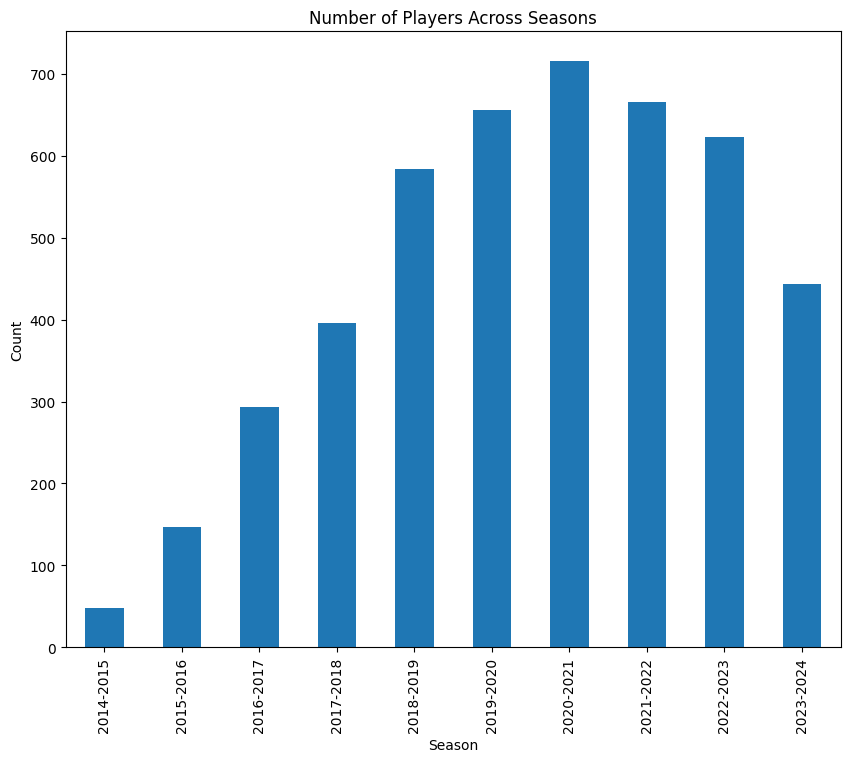

In [8]:
# Visualize the distribution across seasons
season_count = df['Season'].value_counts().sort_index()  # Get distribution of each unique value in Season

# Visualize
plt.figure(figsize=(10,8))

season_count.plot(kind='bar')
plt.ylabel('Count')
plt.title('Number of Players Across Seasons')
plt.show()

- The figures regarding the number of participating players exhibit variations across each season.
- The highest player participation is observed in the 2020-2021 season, with 769 players, while the lowest is in the 2014-2015 season, with 58 players.
- The data on player participation shows an increasing trend from 2014 to 2020, followed by a declining trend from 2021 to 2024.

### Analyzing Squad

In [9]:
# Get Squad data
squad_df =  df['Squad']
squad_df.describe()

count        4571
unique        312
top       Arsenal
freq          178
Name: Squad, dtype: object

- There are a total of 312 different football teams in the dataset.
- Furthermore, it can be observed that a player may participate in different teams across different seasons.

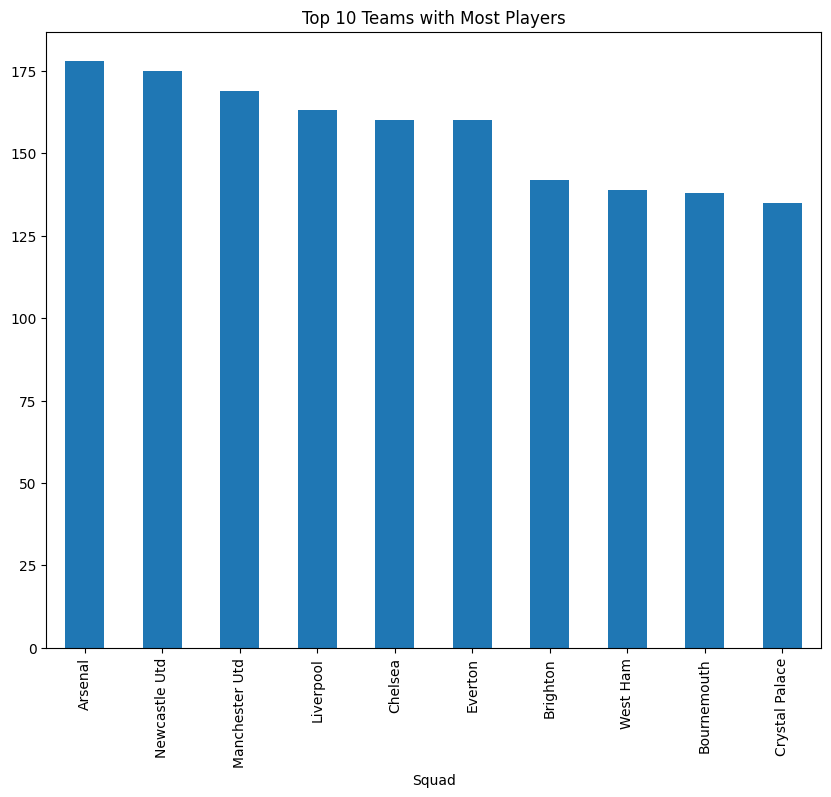

In [10]:
# Visualizes the distribution of players across different teams
squad_count = squad_df.value_counts()   # Count the occurrences of each unique value in the 'Squad' column

# Visualize the distribution of players across teams for the top 10 teams
plt.figure(figsize=(10,8))

squad_count[:10].plot(kind='bar')
plt.title('Top 10 Teams with Most Players')
plt.show()

In [11]:
# Calculate the percentage of players represented by the top 10 teams
print(f'The top 10 teams collectively represent {round((squad_count[:10].sum()/squad_count.sum())*100,2)}% sof the total number of players.')

The top 10 teams collectively represent 34.11% sof the total number of players.


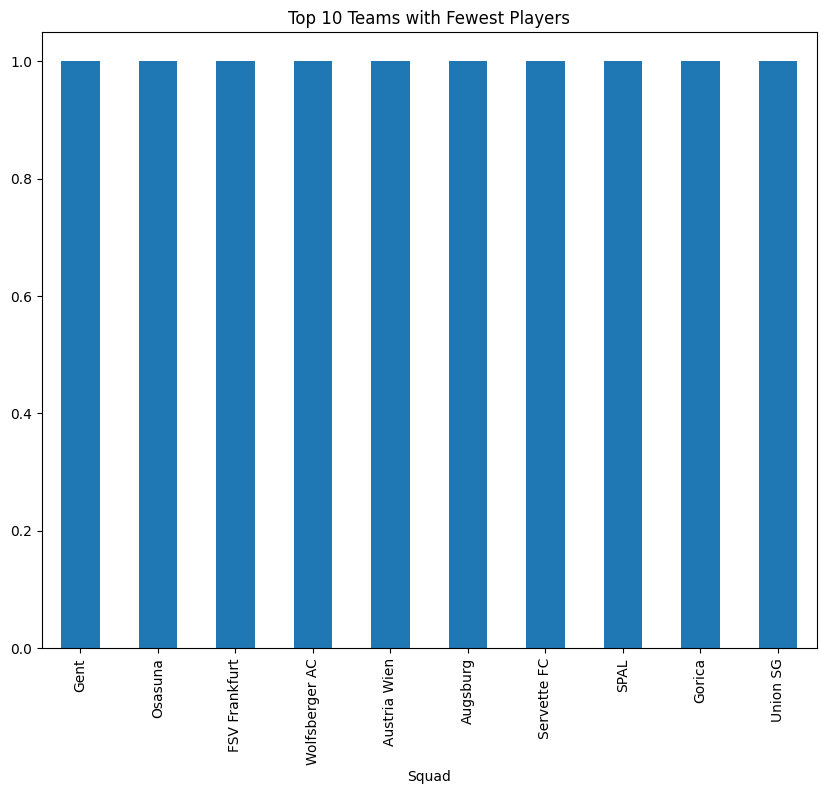

In [12]:
# Visualize the distribution of players across teams for the bottom 10 teams (with the fewest players)
plt.figure(figsize=(10,8))

squad_count[-10:].plot(kind='bar')
plt.title('Top 10 Teams with Fewest Players')
plt.show()

In [13]:
squad_count.describe()

count    312.000000
mean      14.650641
std       32.490064
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      178.000000
Name: count, dtype: float64

- The team with the highest number of participating players over the 10 main seasons is Arsenal.
- The top 10 teams with the most players account for 34.41% of the total number of participating players.
- 25% of the teams have only one player participating across the 10 seasons.

### Analyzing Country

In [14]:
# Get Country data
df_country = df[['Squad', 'Country']].drop_duplicates()['Country']   # Drop dulicated rows in squad and country data
df_country.describe()

count     312
unique     33
top       ENG
freq       83
Name: Country, dtype: object

- There are players from 33 different countries participating in the matches.

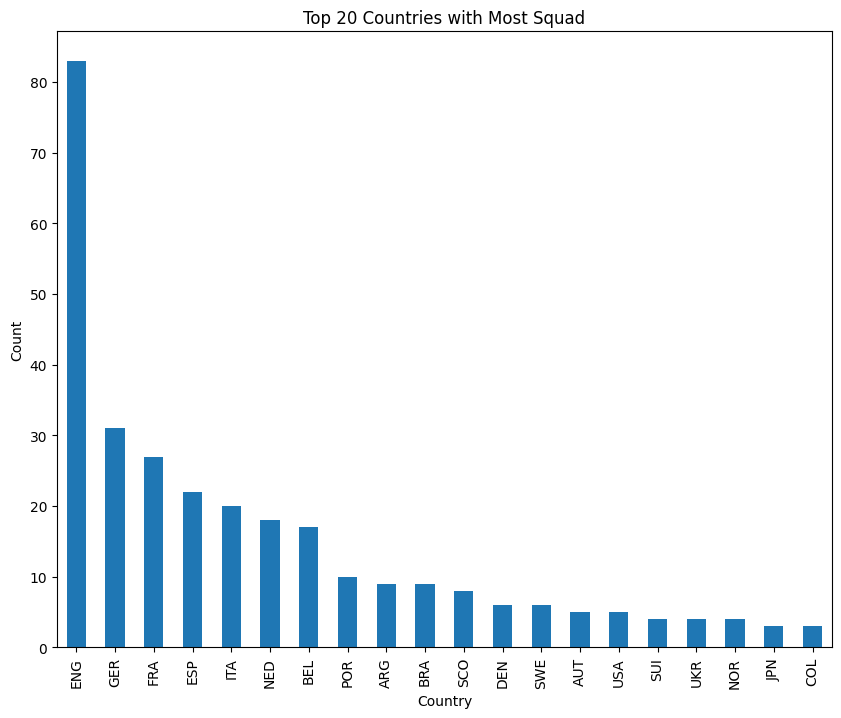

In [15]:
# Visualize the distribution of squad across countries for the top 20 countries
country_count = df_country.value_counts()   # Count the occurrences of each unique value in the 'Country' column

# Visualize
plt.figure(figsize=(10,8))

country_count[:20].plot(kind='bar')
plt.ylabel('Count')
plt.title('Top 20 Countries with Most Squad')
plt.show()

In [16]:
country_count.describe()

count    33.000000
mean      9.454545
std      15.482028
min       1.000000
25%       1.000000
50%       4.000000
75%       9.000000
max      83.000000
Name: count, dtype: float64

- It is evident that ENG (England) has the highest number of participating players, exceeding the second-ranked country, FRA (France), by more than 7 times.
- 75% of the countries have fewer than 9 squad participating in the matches.

### Analyzing Comp

In [17]:
# Get Comp data
df_comp = df['Comp']
df_comp.describe()

count               4571
unique                50
top       Premier League
freq                2201
Name: Comp, dtype: object

- There are statistics for 50 different football leagues in the dataset.

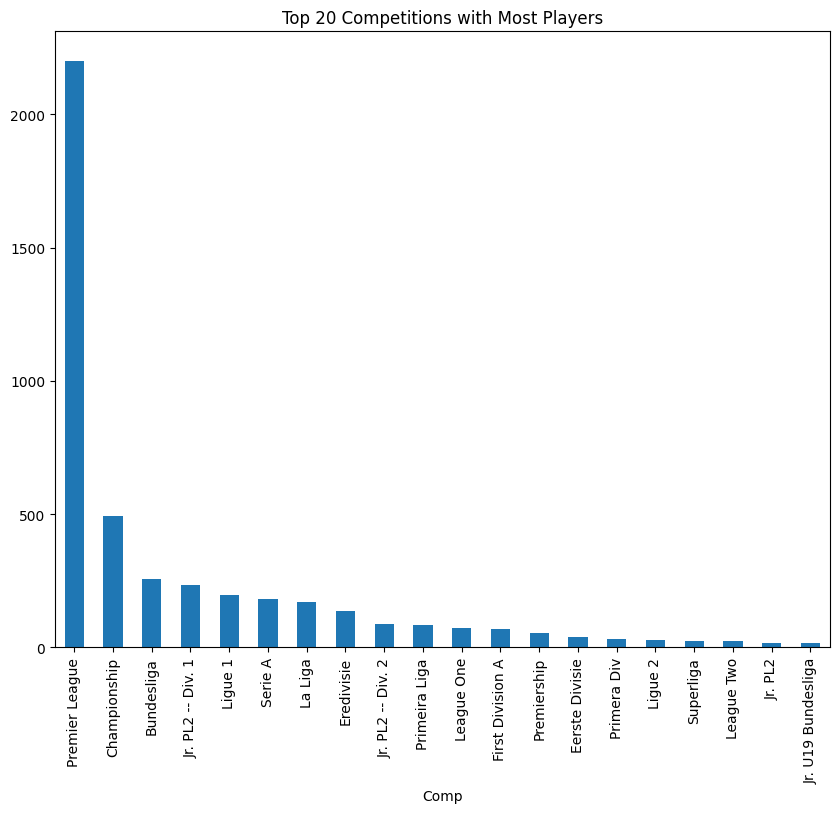

In [18]:
# Visualize the distribution of players across competitions for the top 20 competitions
comp_count = df_comp.value_counts()  # Count the occurrences of each unique value in the 'Comp' column

#Visualize
plt.figure(figsize=(10,8))
comp_count[:20].plot(kind='bar')
plt.title('Top 20 Competitions with Most Players')
plt.show()

In [19]:
comp_count.describe()

count      50.000000
mean       91.420000
std       317.576929
min         1.000000
25%         3.000000
50%        10.000000
75%        49.250000
max      2201.000000
Name: count, dtype: float64

- It is evident that the Premier League has the highest number of participating players, with 2201 players (nearly 50% of the total number of participating players).
- All leagues have at least one player participating in the matches.
- 75% of the leagues have fewer than 49 players participating.

### Analyzing Injury

In [20]:
# Get all Injury data where the 'Injury' column is not NaN
injury_df =  df[df['Injury'].notna()]['Injury']
injury_df.describe()

count                 2601
unique                 178
top       Hamstring injury
freq                   309
Name: Injury, dtype: object

- There are records for 183 different types of injuries suffered by players.

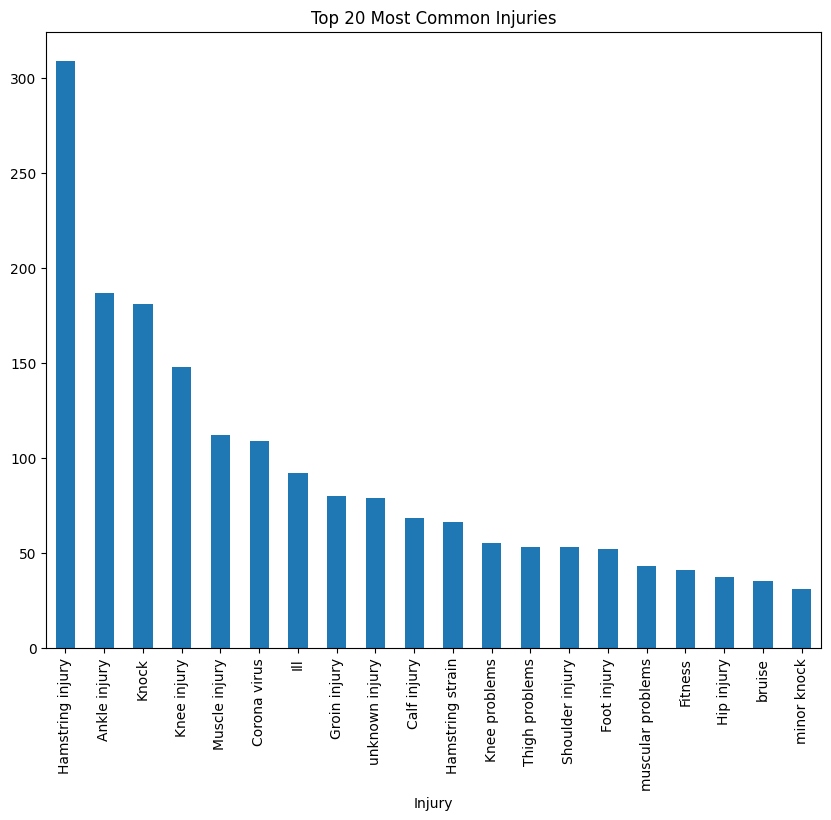

In [21]:
# Visualize the distribution of injuries for the top 20 most common injuries
injury_count = injury_df.value_counts() # Count the occurrences of each unique value in the 'Injury' series

# Visualize
plt.figure(figsize=(10,8))

injury_count[:20].plot(kind='bar')
plt.title('Top 20 Most Common Injuries')
plt.show()

In [22]:
round((injury_count[:20].sum()/injury_count.sum())*100,0)

70.0

In [23]:
injury_count.describe()

count    178.00000
mean      14.61236
std       35.97019
min        1.00000
25%        1.00000
50%        3.00000
75%        9.75000
max      309.00000
Name: count, dtype: float64

- The most frequently occurring injury type is "Hamstring injury," appearing 311 times.
- The top 20 injuries, in terms of frequency, constitute nearly 70% of the total number of player injuries.
- The majority of injuries (75% of injury types) have fewer than 7 occurrences.

## Numerical data

In [24]:
# retrieve columns with numeric datatype amd their keys
selected_columns = ['Name', 'Season','Squad'] + list(df.select_dtypes(include=['float64', 'int64']).columns)
df_num = df[selected_columns]
pd.set_option('display.max_columns', None)
df_num.head()

,Name,Season,Squad,Age,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Days,Games missed
0,William Saliba,2018-2019,Saint-Étienne,17,4,16,13,1277,14.2,0,0,0,0,0,0,1,0,0.300000,0.300000,0.000000,0.300000,7,21,4,0.00,0.0,0.00,0.00,0.00,0.020000,0.000000,0.020000,0.020000,0.020000,128.0,22.0
1,William Saliba,2019-2020,Saint-Étienne,18,17,12,11,992,11.0,0,0,0,0,0,0,0,0,0.200000,0.200000,0.100000,0.300000,20,33,7,0.00,0.0,0.00,0.00,0.00,0.020000,0.010000,0.030000,0.020000,0.030000,77.0,19.0
2,William Saliba,2020-2021,Nice,19,9,20,20,1800,20.0,1,0,1,1,0,0,2,0,0.800000,0.800000,0.000000,0.900000,36,106,3,0.05,0.0,0.05,0.05,0.05,0.040000,0.000000,0.040000,0.040000,0.040000,NaN,NaN
3,William Saliba,2020-2021,Arsenal,19,10,6,6,526,5.8,0,0,0,0,0,0,1,0,1.103445,1.072249,1.269282,2.340478,0,0,0,0.00,0.0,0.00,0.00,0.00,0.058096,0.079837,0.137923,0.056746,0.136612,NaN,NaN
4,William Saliba,2021-2022,Marseille,20,2,36,36,3240,36.0,0,0,0,0,0,0,5,0,1.700000,1.700000,0.400000,2.100000,50,220,14,0.00,0.0,0.00,0.00,0.00,0.050000,0.010000,0.060000,0.050000,0.060000,NaN,NaN


**According to fbref.com, data columns is splitted into 5 main catergories, including Playing time, Performance, Expected, Progression and Per 90 Minutes which takes statistics from Performance and Expected and divides by 90. In Transfermarkt's data, there is only few numeric columns so there is no need to group them**

In [25]:
group_dict = {'Playing time':['MP','Starts','Min','90s'],
              'Performance':['Gls','Ast','G+A','G-PK','PK','PKatt','CrdY','CrdR'],
              'Expected':['xG','npxG','xAG','npxG+xAG'],
              'Progression':['PrgC','PrgP','PrgR'],
              'Per 90 Minutes':['Gls/90','Ast/90','G+A/90','G-PK/90','G+A-PK/90','xG/90','xAG/90','xG+xAG/90','npxG/90','npxG+xAG/90']}

### Playing time distribution

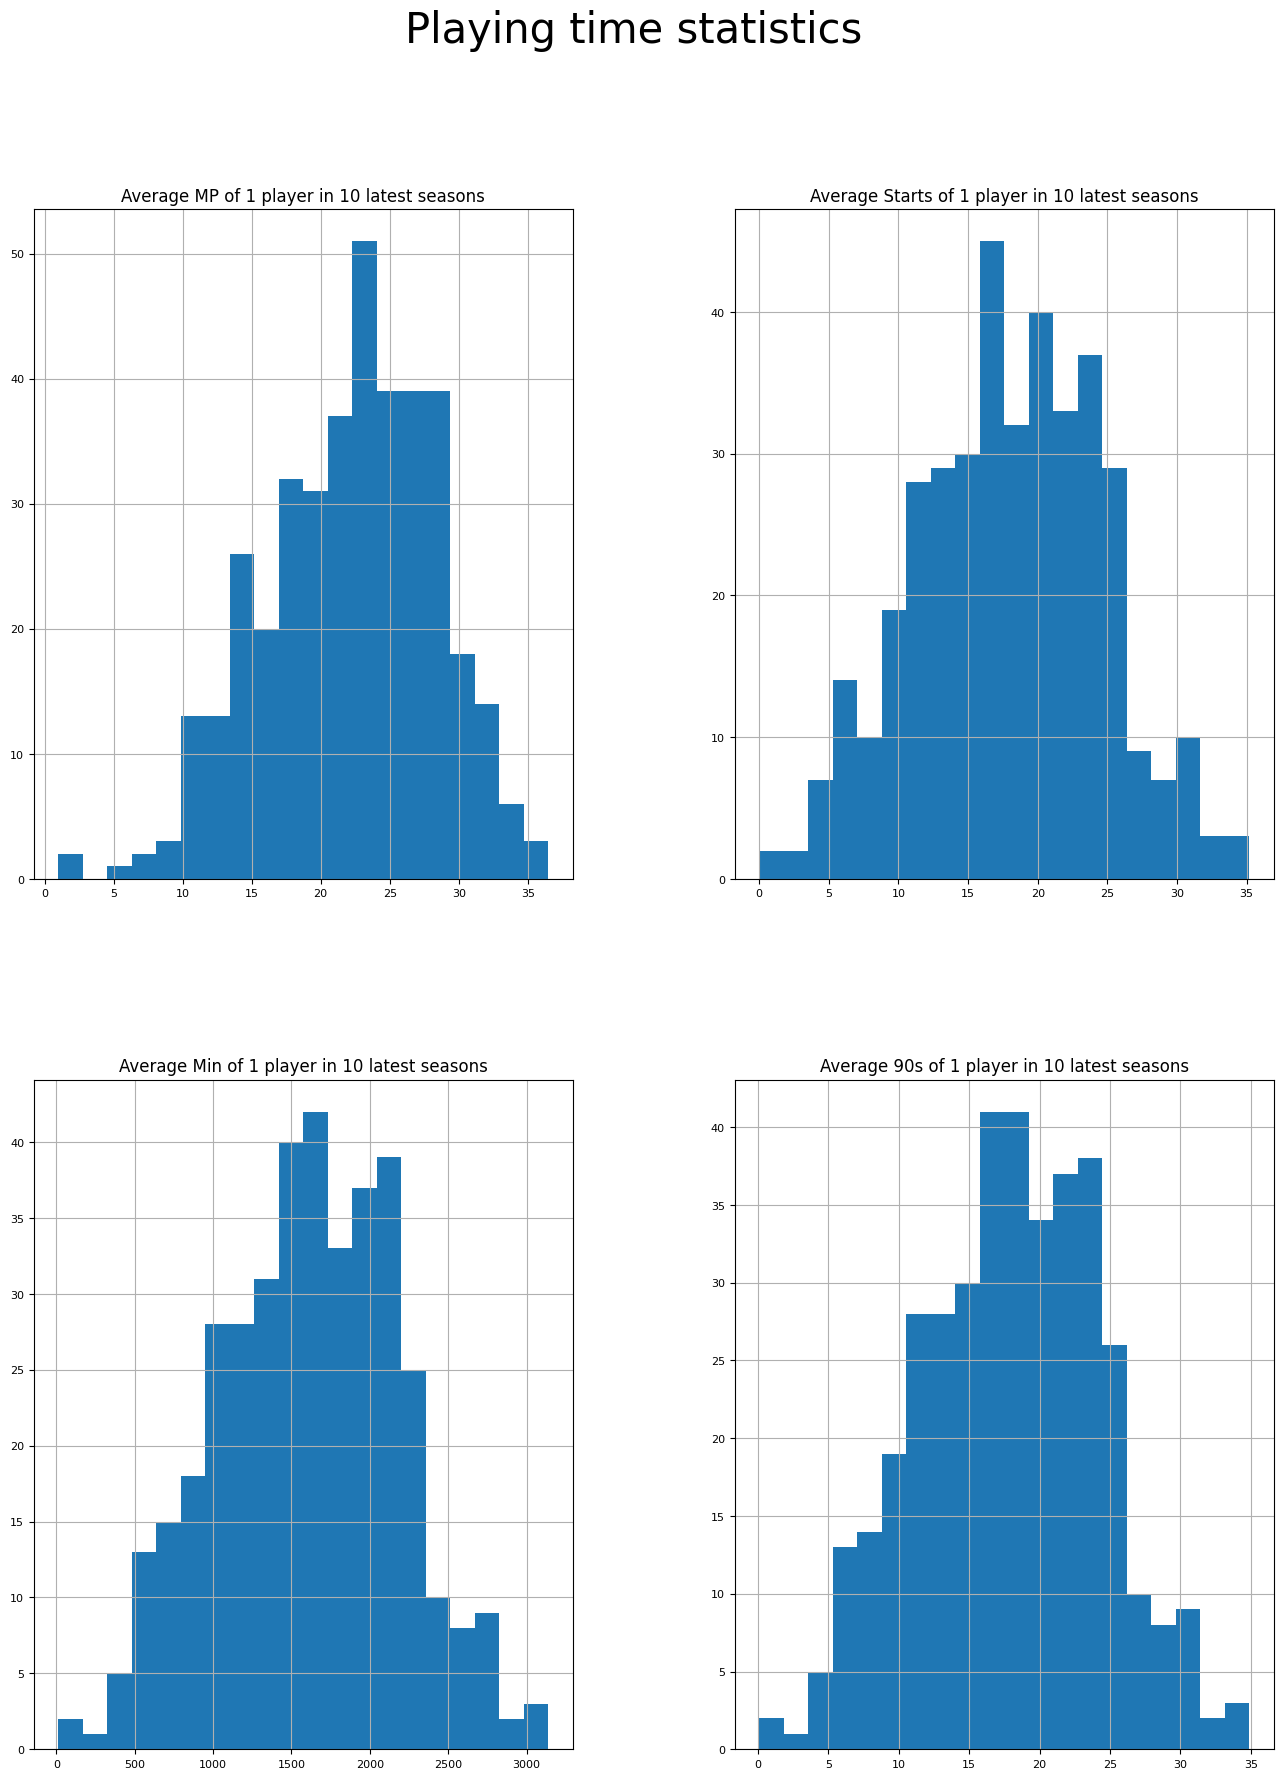

In [26]:
play_time_df = df_num[['Name','Season','Squad',] + group_dict['Playing time']]

# When merging there is some duplicate rows in term of playing time related columns because some players have more than 1 injuries in 1 season
play_time_df = play_time_df.drop_duplicates(['Name','Season','Squad']).reset_index(drop = True)
play_time_df_copy = play_time_df.copy()

# Group by player name and season and sum them to calculate 1 player's stats in one season in case some player in one season may play for 2 different squad
total_play_time_df = pd.DataFrame()
for col in group_dict['Playing time']:
    total_play_time_df['Total_'+ col] = play_time_df_copy.groupby(['Name','Season'])[col].sum()

# Group by player name and calculate their average stats throughout considered seasons
avg_play_time_df = pd.DataFrame()
for col in group_dict['Playing time']:
    avg_play_time_df['Average '+ col + ' of 1 player in 10 latest seasons'] = total_play_time_df.groupby(['Name'])['Total_' + col].mean()

# visualize
avg_play_time_df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.suptitle('Playing time statistics', fontsize = 30)
plt.show()

**Observation**: All columns are approximately normally distributed, meaning that we acquire good variety of datas. These columns can be used for training wthout bias causing.

### Performance Distribution

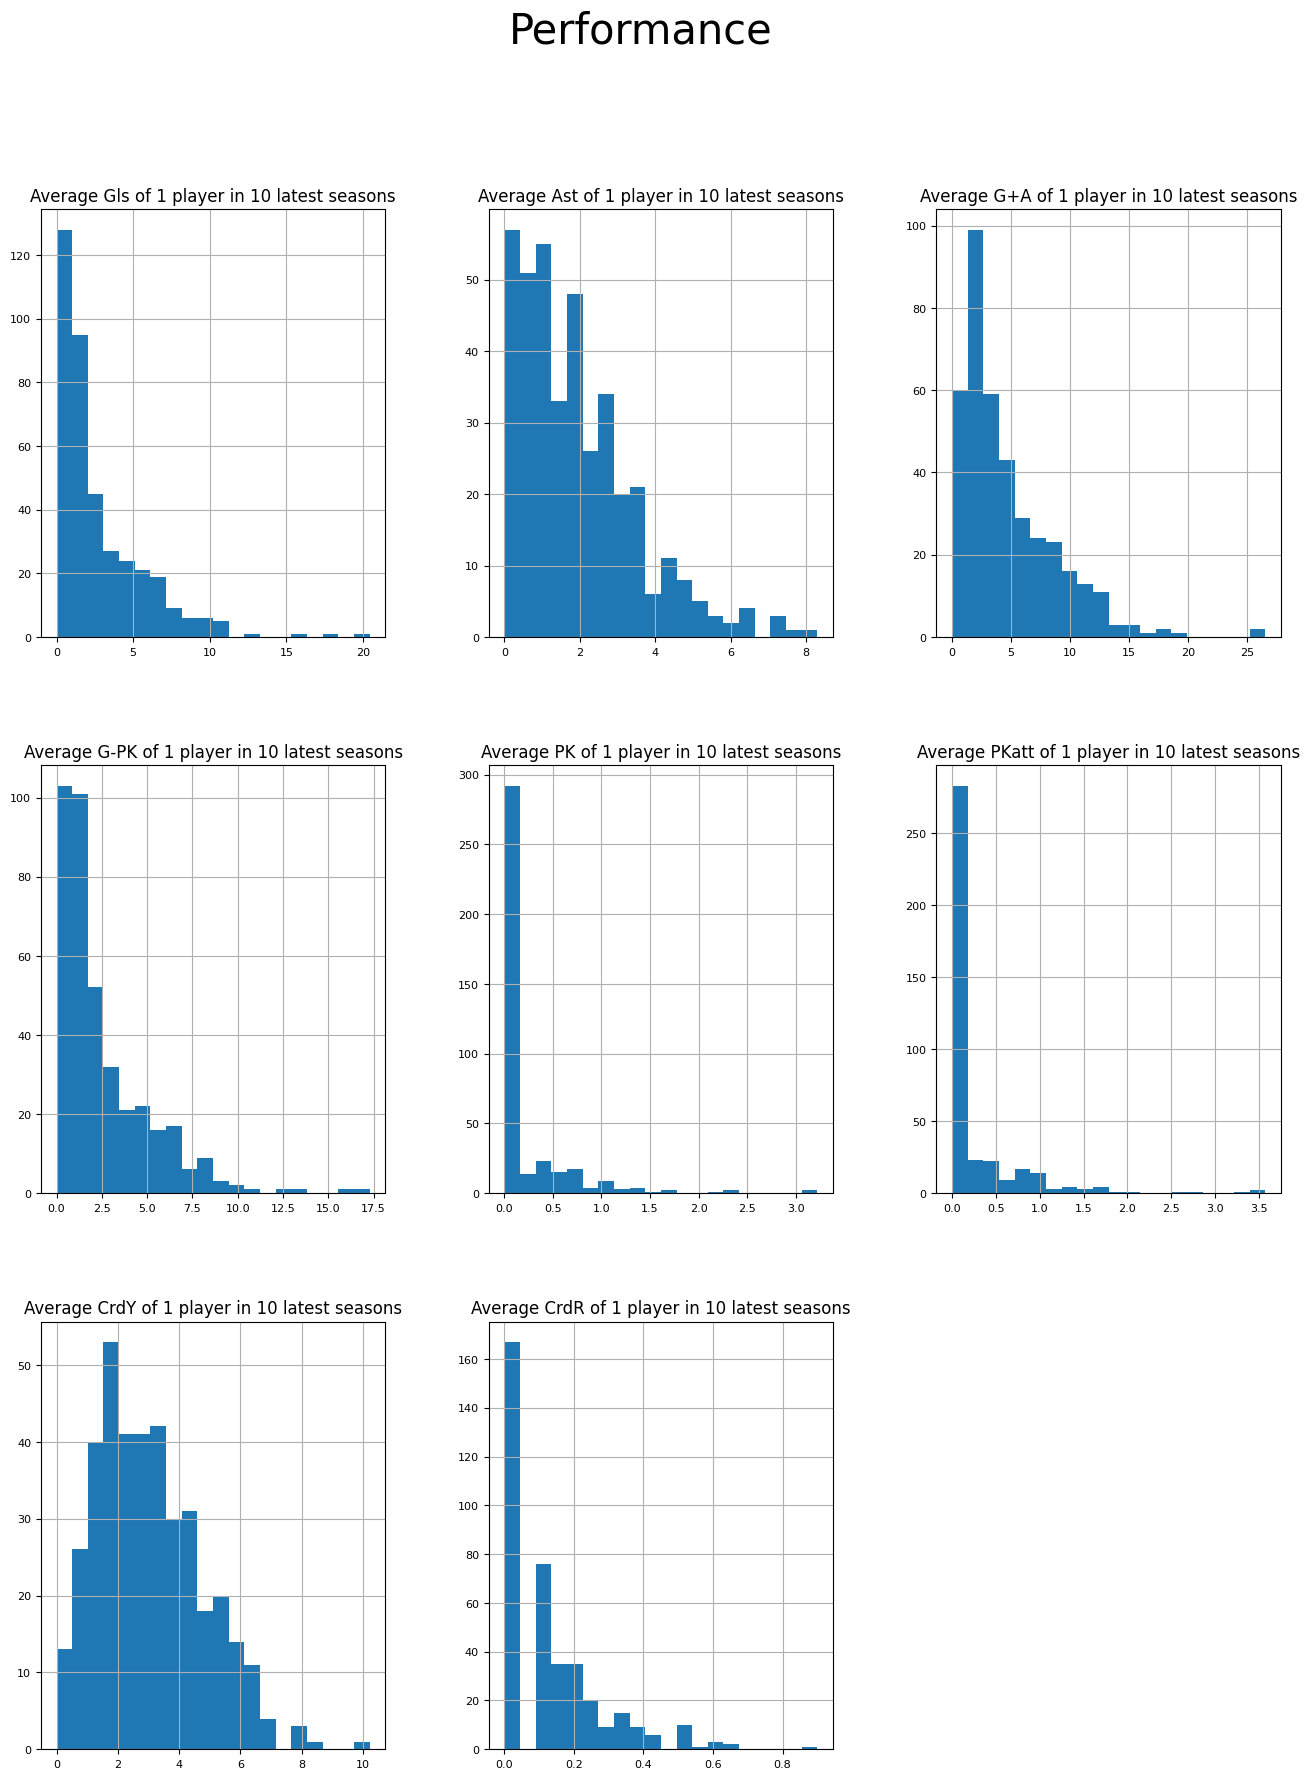

In [27]:
performance_df = df_num[['Name', 'Season', 'Squad'] + group_dict['Performance']]

performance_df = performance_df.drop_duplicates(['Name', 'Season', 'Squad']).reset_index(drop=True)
performance_df_copy = performance_df.copy()

total_performance_df = pd.DataFrame()
for col in group_dict['Performance']:
    total_performance_df['Total_' + col] = performance_df_copy.groupby(['Name', 'Season'])[col].sum()

avg_performance_df = pd.DataFrame()
for col in group_dict['Performance']:
    avg_performance_df['Average ' + col + ' of 1 player in 10 latest seasons'] = total_performance_df.groupby(['Name'])['Total_' + col].mean()

# Visualize
avg_performance_df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.suptitle('Performance',fontsize = 30)
plt.show()

**Observation**: Most columns are approximately exponentially distributed (except CrdY is normal distribution and  positive skewed). This is a problem as bias will occur without preprocessing. A good way to achieve normal distribution is to use natural logarithm for preprocessing. However, if later stage model need these columns, we will consider specifc columns that need logarithm applied.

### Expected distribution

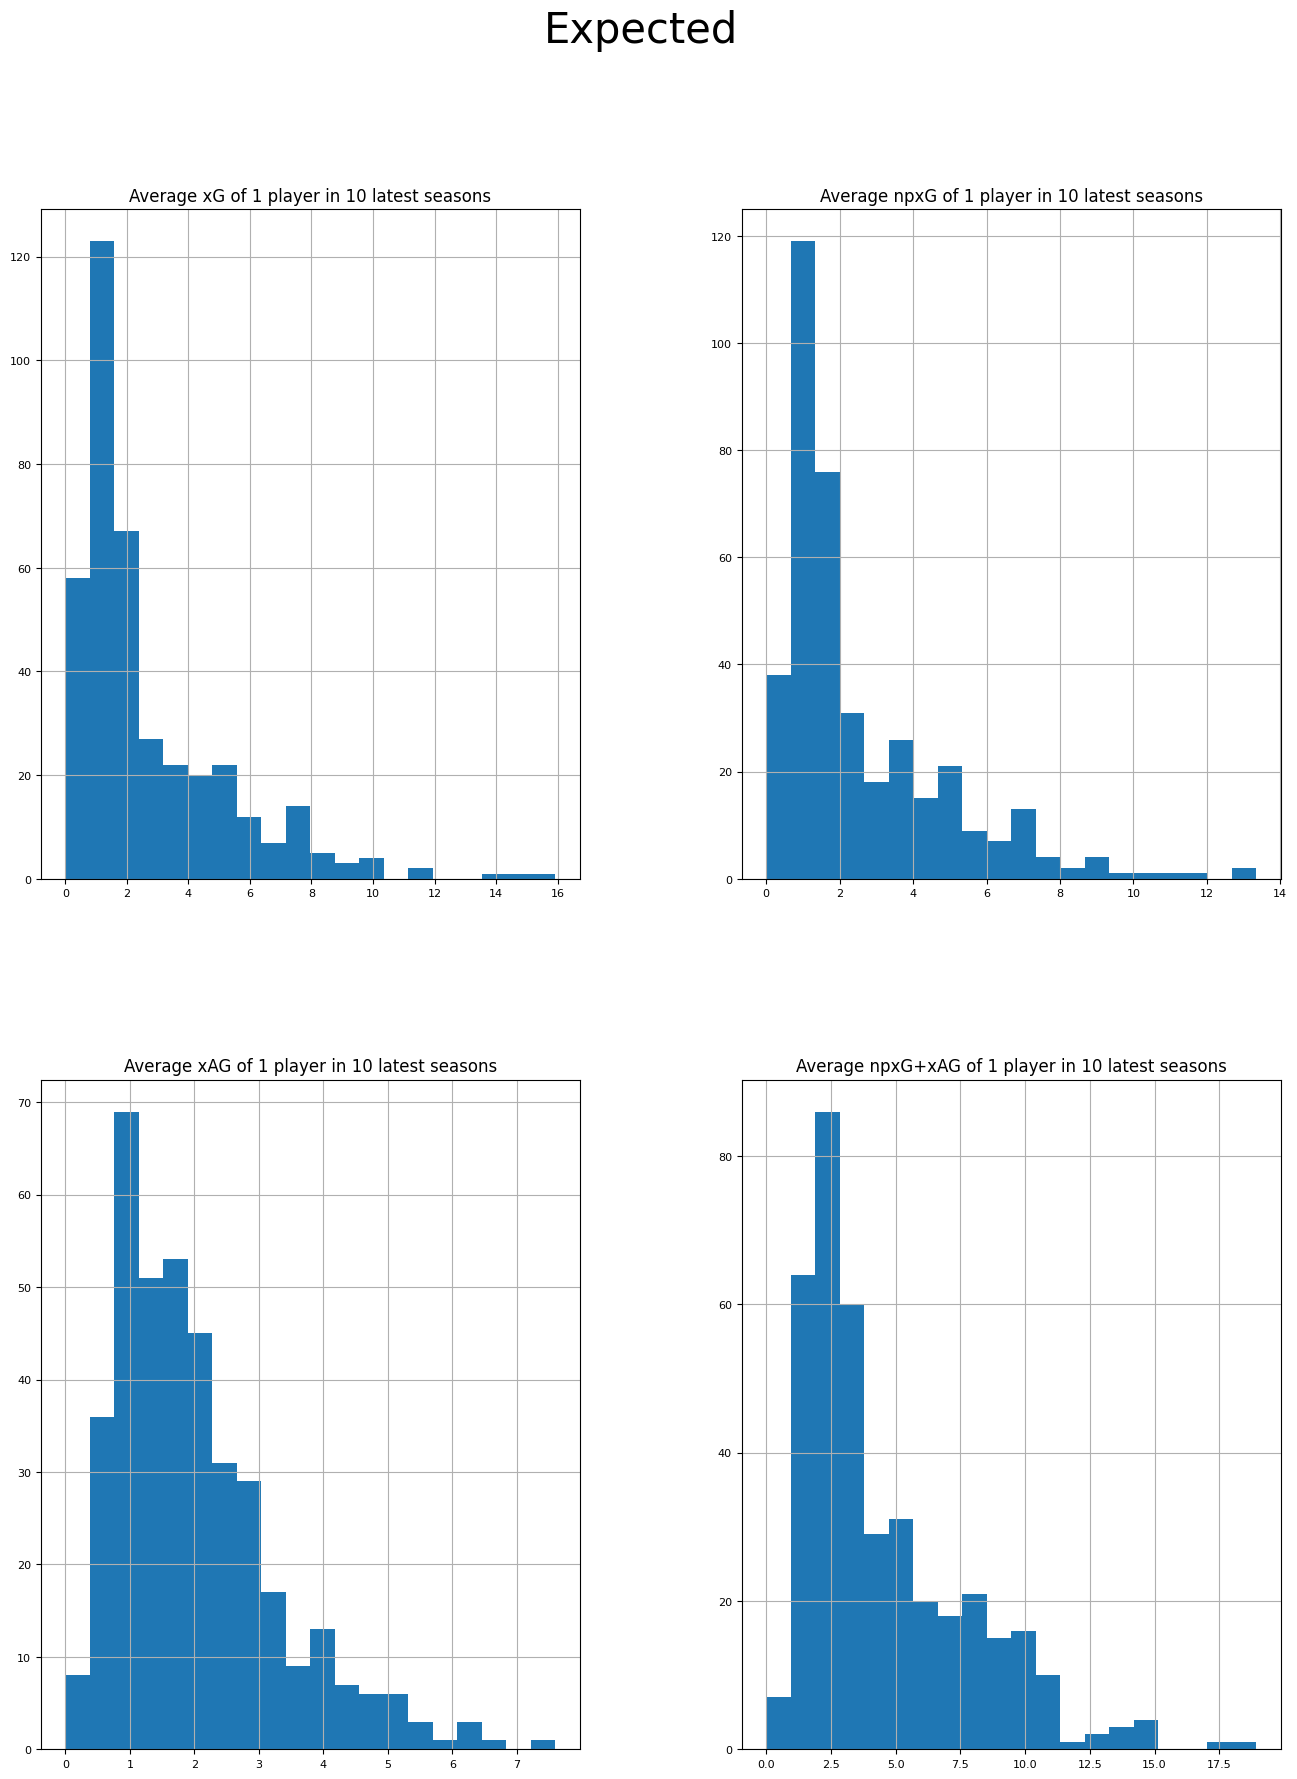

In [28]:
expected_df = df_num[['Name', 'Season', 'Squad'] + group_dict['Expected']]

# Drop duplicates based on 'Name', 'Season', 'Squad'
expected_df = expected_df.drop_duplicates(['Name', 'Season', 'Squad']).reset_index(drop=True)
expected_df_copy = expected_df.copy()

# Create a total DataFrame by summing up values for each player and season
total_expected_df = pd.DataFrame()
for col in group_dict['Expected']:
    total_expected_df['Total_' + col] = expected_df_copy.groupby(['Name', 'Season'])[col].sum()

# Create an average DataFrame by calculating the mean for each player across seasons
avg_expected_df = pd.DataFrame()
for col in group_dict['Expected']:
    avg_expected_df['Average ' + col + ' of 1 player in 10 latest seasons'] = total_expected_df.groupby(['Name'])['Total_' + col].mean()

# Visualize
avg_expected_df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.suptitle('Expected', fontsize = 30) 
plt.show()

**Observation**: Most columns are approximately exponentially distributed (except xAG is normal distribution and  positive skewed). This is a problem as bias will occur without preprocessing. A good way to achieve normal distribution is to use natural logarithm for preprocessing. However, if later stage model need these columns, we will consider specifc columns that need logarithm applied.

### Progression Distribution

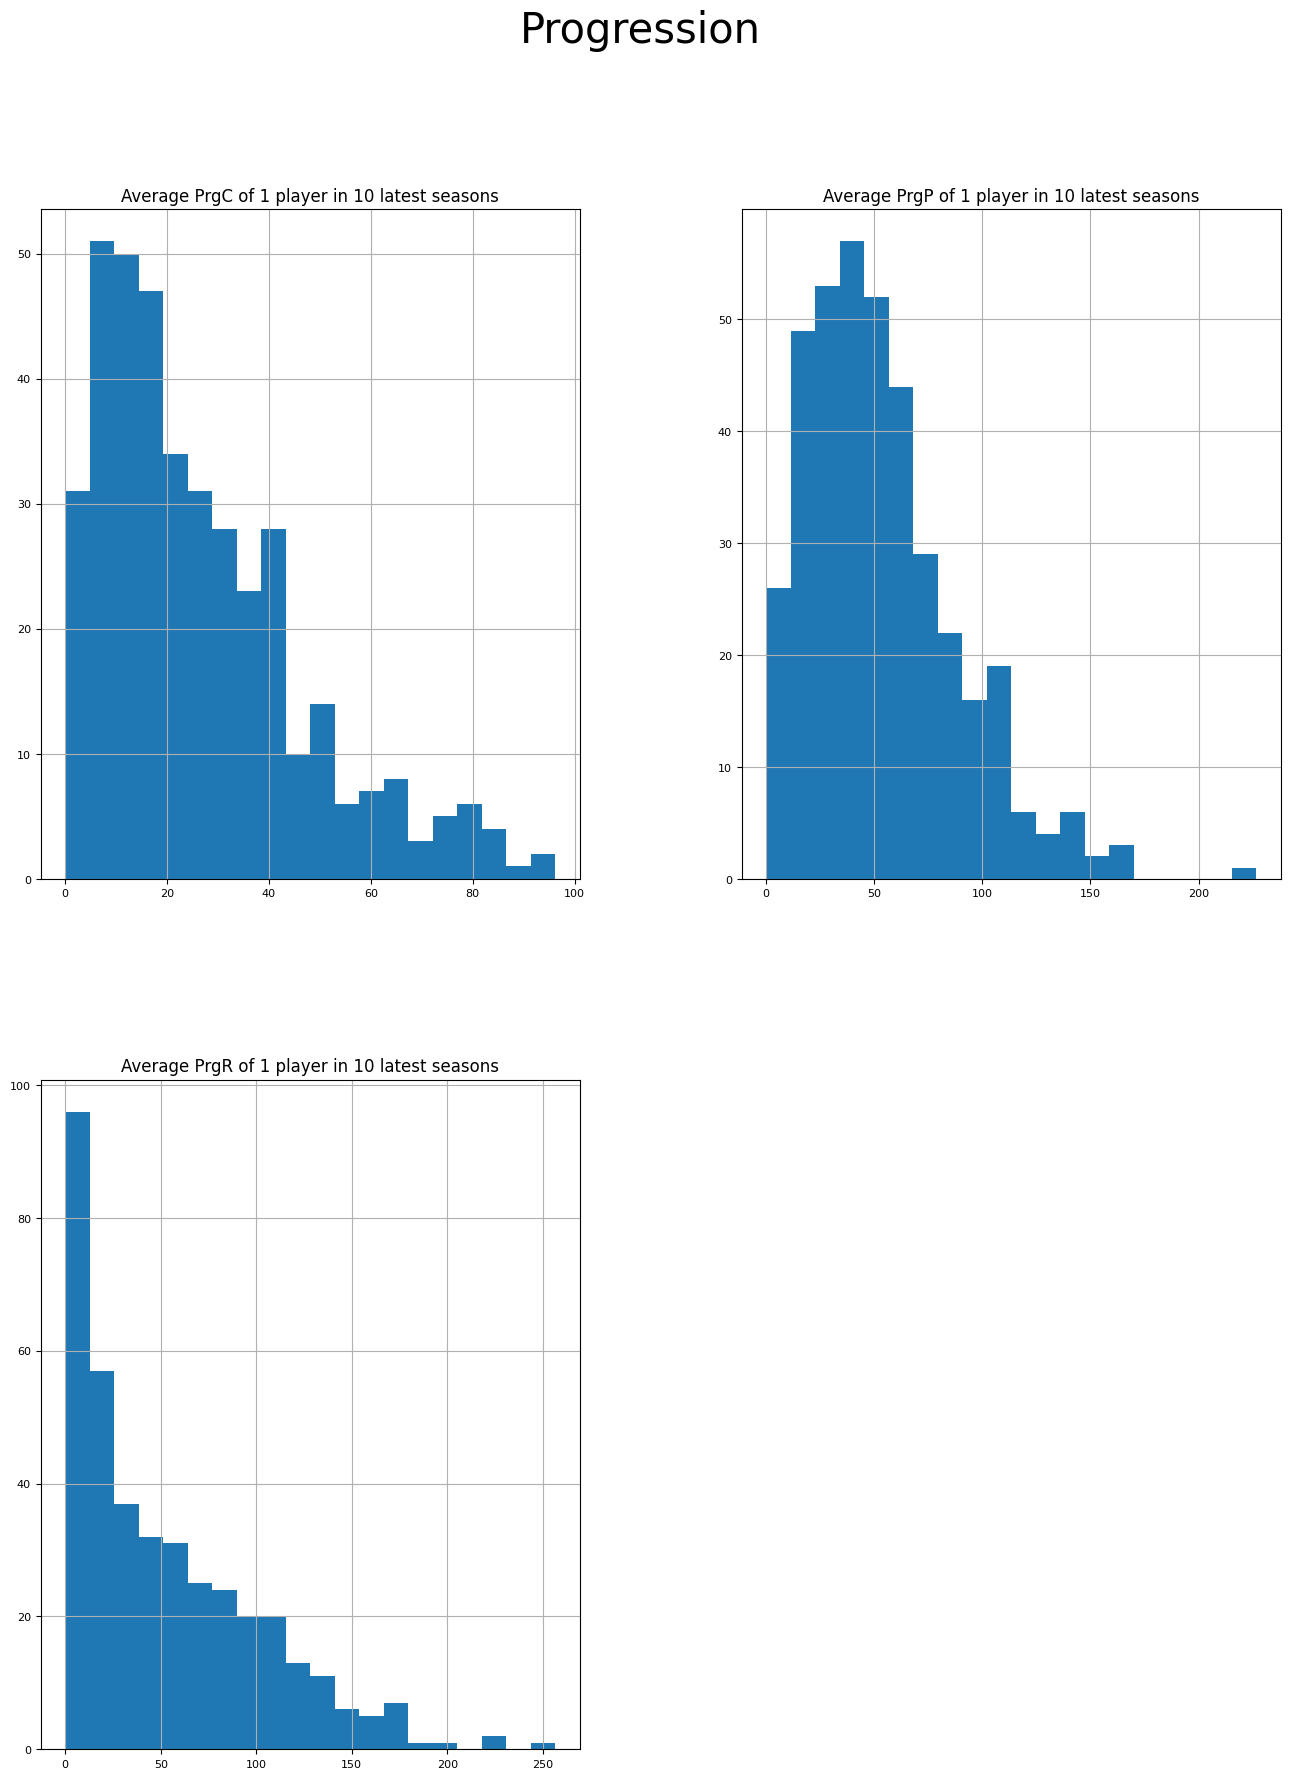

In [29]:
progression_df = df_num[['Name', 'Season', 'Squad'] + group_dict['Progression']]

# Drop duplicates based on 'Name', 'Season', 'Squad'
progression_df = progression_df.drop_duplicates(['Name', 'Season', 'Squad']).reset_index(drop=True)
progression_df_copy = progression_df.copy()

# Create a total DataFrame by summing up values for each player and season
total_progression_df = pd.DataFrame()
for col in group_dict['Progression']:
    total_progression_df['Total_' + col] = progression_df_copy.groupby(['Name', 'Season'])[col].sum()

# Create an average DataFrame by calculating the mean for each player across seasons
avg_progression_df = pd.DataFrame()
for col in group_dict['Progression']:
    avg_progression_df['Average ' + col + ' of 1 player in 10 latest seasons'] = total_progression_df.groupby(['Name'])['Total_' + col].mean()

# Visualize
avg_progression_df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.suptitle('Progression',fontsize = 30)  # Add the group name as the title
plt.show()

**Observation**: Most columns are approximately exponentially distributed normally distributed but positive skewed. This is a problem as bias will occur without preprocessing. A good way to achieve normal distribution is to use natural logarithm for preprocessing. However, if later stage model need these columns, we will consider specifc columns that need logarithm applied.

### Per 90 Minutes Distribution

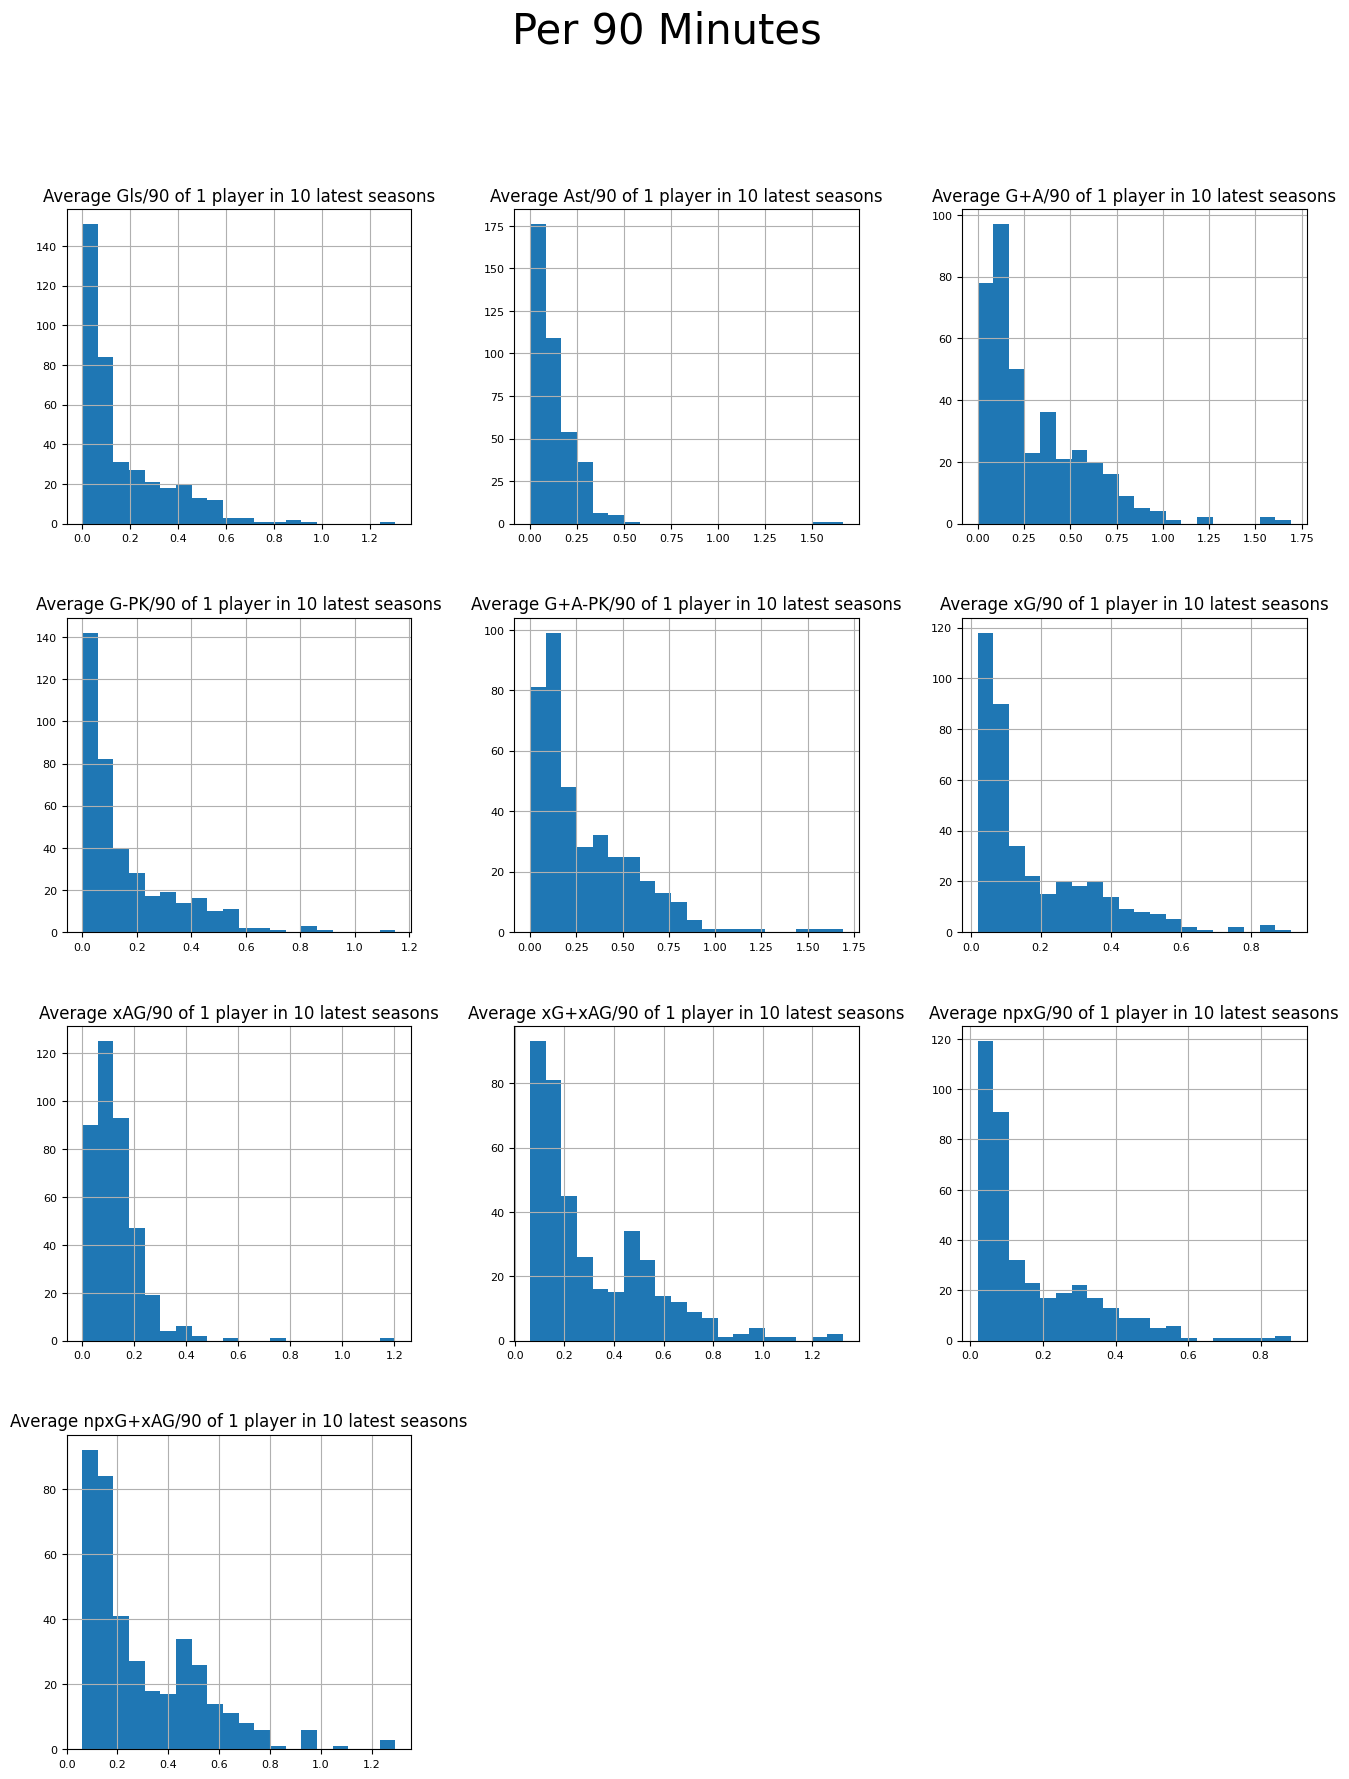

In [30]:
# Select columns for the 'Per 90 Minutes' group
per_90_df = df_num[['Name', 'Season', 'Squad'] + group_dict['Per 90 Minutes']]

# Drop duplicates based on 'Name', 'Season', 'Squad'
per_90_df = per_90_df.drop_duplicates(['Name', 'Season', 'Squad']).reset_index(drop=True)
per_90_df_copy = per_90_df.copy()

# Create a total DataFrame by summing up values for each player and season
total_per_90_df = pd.DataFrame()
for col in group_dict['Per 90 Minutes']:
    total_per_90_df['Total_' + col] = per_90_df_copy.groupby(['Name', 'Season'])[col].sum()

# Create an average DataFrame by calculating the mean for each player across seasons
avg_per_90_df = pd.DataFrame()
for col in group_dict['Per 90 Minutes']:
    avg_per_90_df['Average ' + col + ' of 1 player in 10 latest seasons'] = total_per_90_df.groupby(['Name'])['Total_' + col].mean()

# Visualize
avg_per_90_df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.suptitle('Per 90 Minutes',fontsize = 30)
plt.show()

**Observation**: All columns are approximately exponentially distributed . This is a problem as bias will occur without preprocessing. A good way to achieve normal distribution is to use natural logarithm for preprocessing. However, if later stage model need these columns, we will consider specifc columns that need logarithm applied.

### Injury Data

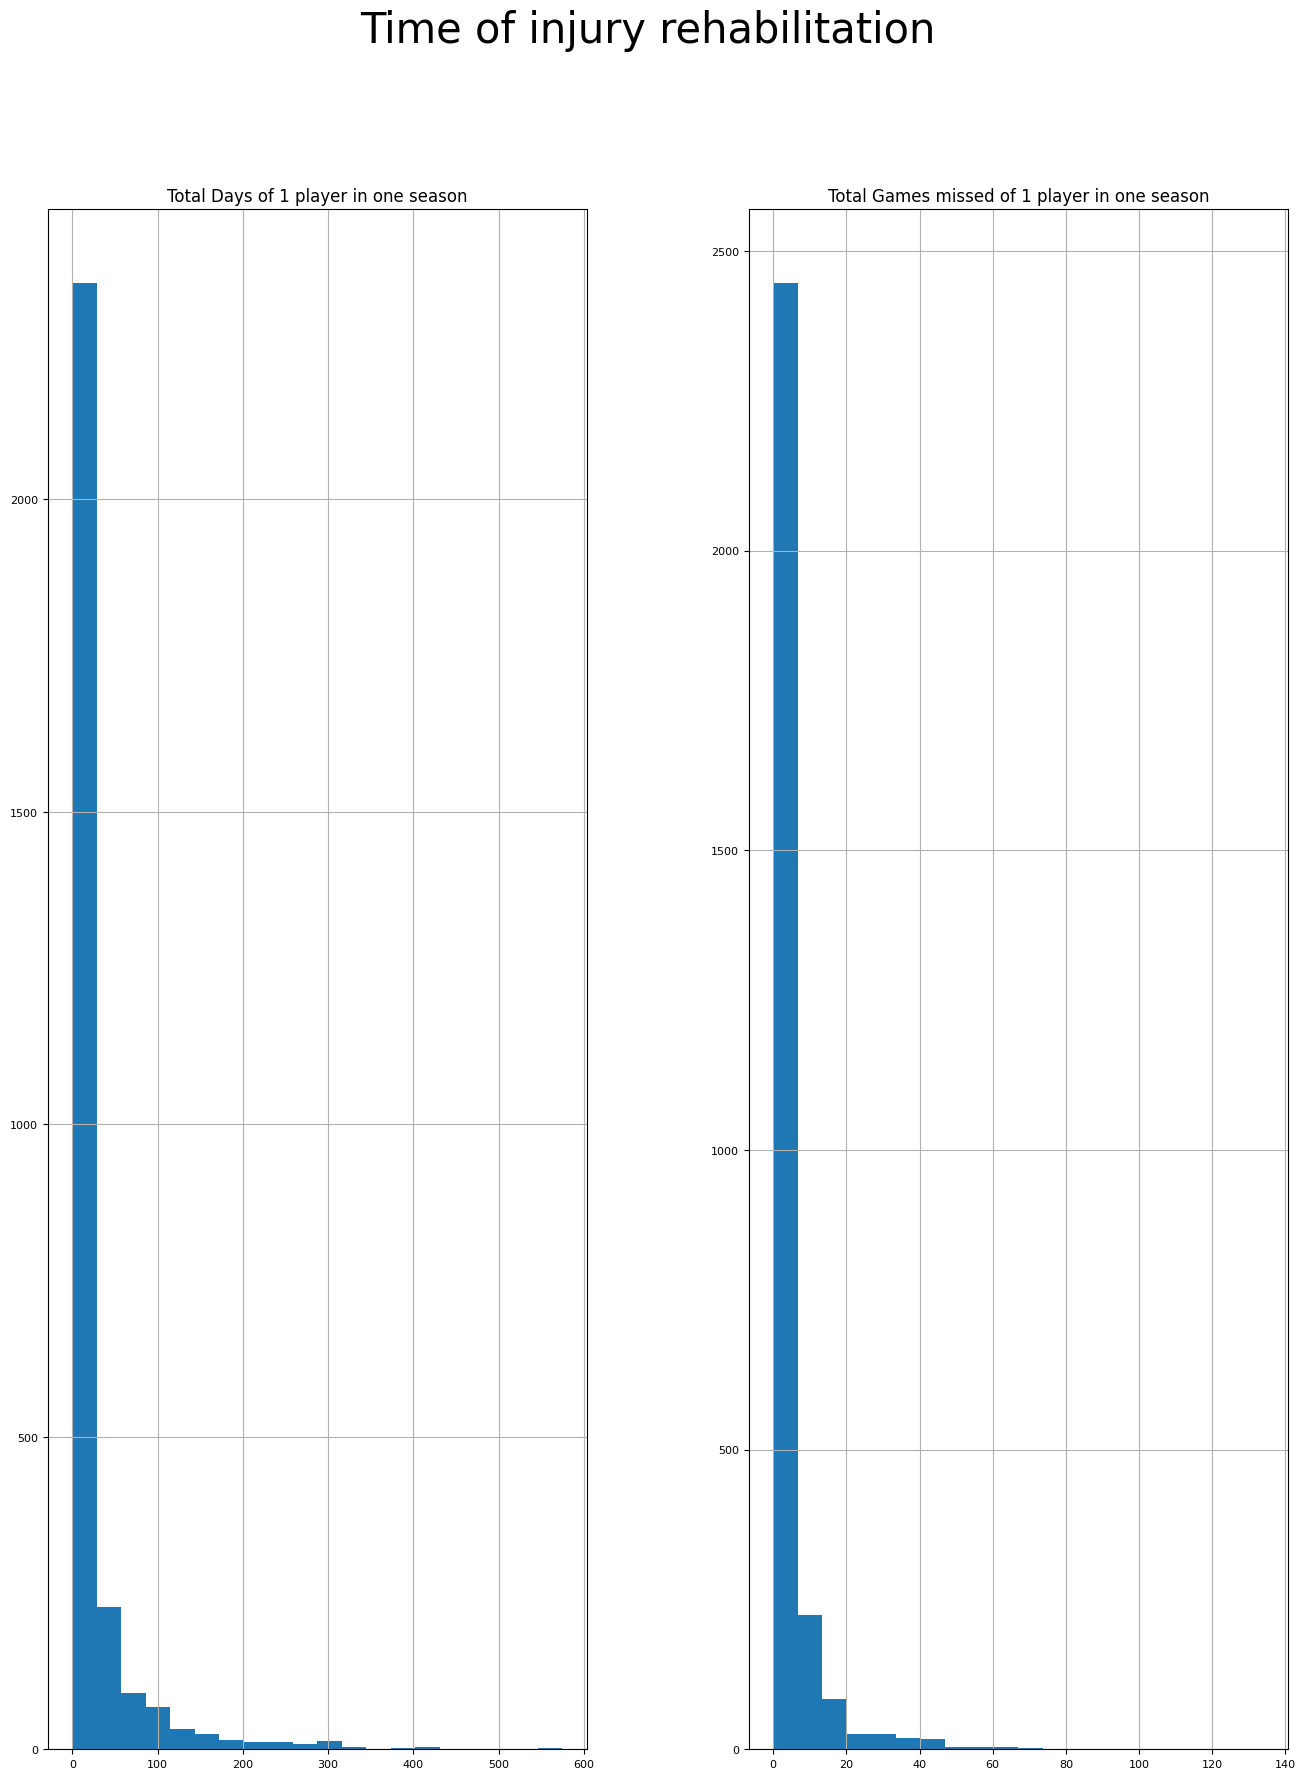

In [31]:
injury_df = df_num[['Name','Season', 'Squad','Days','Games missed']]

# Drop duplicates based on 'Name', 'Season', 'Squad'
injury_df = injury_df.drop_duplicates(['Name', 'Season', 'Squad']).reset_index(drop=True)
injury_df_copy = injury_df.copy()

# Create a total DataFrame by summing up values for each player and season
total_injury_df = pd.DataFrame()
for col in ['Days','Games missed']:
    total_injury_df['Total ' + col + ' of 1 player in one season'] = injury_df_copy.groupby(['Name', 'Season'])[col].sum()

# Visualize
total_injury_df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.suptitle('Time of injury rehabilitation',fontsize = 30) 
plt.show()

**Observation**: All columns are approximately exponentially distributed . This is a problem as bias will occur without preprocessing. A good way to achieve normal distribution is to use natural logarithm for preprocessing. However, if later stage model need these columns, we will consider specifc columns that need logarithm applied.

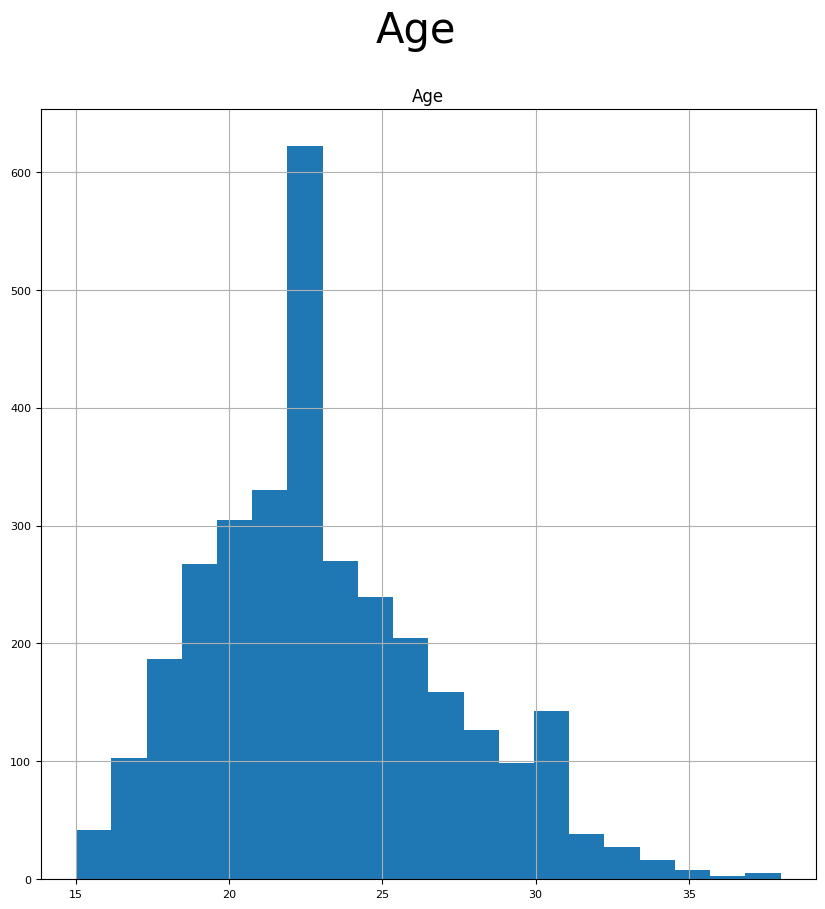

In [32]:
age_df = df_num[['Name','Season', 'Squad','Age']]

# Drop duplicates based on 'Name', 'Season', 'Squad'
age_df = age_df.drop_duplicates(['Name', 'Season', 'Squad']).reset_index(drop=True)

age_df.hist(figsize=(10, 10), bins=20, xlabelsize=8, ylabelsize=8)
plt.suptitle('Age',fontsize = 30) 
plt.show()

**Observation**: This column approximately normally distributed, meaning that we acquire good variety of datas. These columns can be used for training wthout bias causing.

# Making question

## Question 1

**A possible question is:** Premier League is one of the top 5 European league, therefore, mnany players from epl are scouted by many top club in the world based on their league performance. Usually, forward or attacking positions account for most noticable transfers around the world. **Uderstanding that**, a brief of analyzing on forward's performance can provide many information for players scouting.\
**How we answer this question**: Aggregate and analyze performance metrics on 2 pairs: non-penalty goals (G-PK) and expected non-penalty goals (npxG), goals (Gls) and expected goals (xG) columns by season in premier league games only.

### Preprocessing

In [33]:
# Retrieve forward players and needed columns
q1_df = df.copy()
goal_cols= ['Name','Season','Squad','Gls','G-PK','xG','npxG']
q1_df = q1_df[(q1_df['Position']=='FW') & (q1_df['Comp']=='Premier League')][goal_cols]

# 1 player may injured more than once in one season so need drop his duplicated stats 
q1_df = q1_df.drop_duplicates(['Name','Season','Squad']).reset_index(drop=True)

# group by season to calculate total stats in 1 season of 1 player
q1_clean_df = pd.DataFrame()
for col in q1_df.drop(['Name','Season','Squad'],axis = 1).columns.values:
    q1_clean_df[col] = q1_df.groupby(['Name','Season'])[col].sum()
print(f"Shape: {q1_clean_df.shape}")
q1_clean_df.head(10)

Shape: (515, 4)


Gls  G-PK        xG      npxG
Name         Season                                  
Adam Lallana 2015-2016    4     4  4.881319  4.480586
             2016-2017    8     8  4.881319  4.480586
             2017-2018    0     0  1.500000  1.500000
             2018-2019    0     0  0.300000  0.300000
             2019-2020    1     1  0.800000  0.800000
             2020-2021    1     1  1.600000  1.600000
             2021-2022    0     0  1.100000  1.100000
             2022-2023    2     2  0.900000  0.900000
             2023-2024    0     0  0.000000  0.000000
Adama Traoré 2016-2017    0     0  4.881319  4.480586

- Match played, Goals per 90 minutes,... are in fact important columns to take into account as they provide a middle step to get insights into player's stats per matches or their overall performance in other word. However, in our case, stats per matches is not considered because of the imbalance of teams in the leagues. Some teams provide a lot more opportunities for their forwards than the rest. Understanding that, we will only focus on how effective forwards convert their chance into goals only

## Question 2

**A possible question is:** Are players more prone to injuries as they age?

**Answering this question will** explore if there's a relationship between a player's age and the likelihood of sustaining injuries.

**How we answer this question:** Analyze the frequency and types of injuries across different age groups.

## Question 3

**A possible question is:** How does the average duration of rest vary across different types of injuries?

**Answering this question will** help us understand the typical recovery time associated with each type of injury.

**How we answer this question:** Calculate the average duration of rest for each reported injury type.

## Question 4

**A possible question is:** How does the distribution of football players vary among countries in the dataset ?

**Answering this question will** help us understand the spread of player representation across different countries.

**How we answer this question:** Examine the distribution of players among various countries.

## Question 5

**A possible question is:** What is the relationship between expected goals (xG) to actual goals (Gls) for penalty kicks (PK)?

**Answering this question will** help us understand the efficiency of players in converting penalty kicks compared to their expected goals.

**How we answer this question:** Calculate the ratio of 'xG' to 'Gls' specifically for penalty kicks.

### Preprocessing

In [34]:
# Retrieve 'Name', 'Season', 'Gls' and 'xG' data
gls_and_xG_df = df[['Name', 'Season', 'Gls', 'xG']]
gls_and_xG_df

,Name,Season,Gls,xG
0,William Saliba,2018-2019,0,0.300000
1,William Saliba,2019-2020,0,0.200000
2,William Saliba,2020-2021,1,0.800000
3,William Saliba,2020-2021,0,1.103445
4,William Saliba,2021-2022,0,1.700000
...,...,...,...,...
4566,Hjalmar Ekdal,2019-2020,2,1.103445
4567,Hjalmar Ekdal,2020-2021,0,1.103445
4568,Hjalmar Ekdal,2021-2022,4,1.103445
4569,Hjalmar Ekdal,2022-2023,3,1.103445


In [35]:
# Drop duplicated rows by 'Name' and 'Season'
gls_and_xG_df = gls_and_xG_df.drop_duplicates(subset=['Name', 'Season'])
gls_and_xG_df = gls_and_xG_df.drop(columns='Season')    # Drop irrelevant column
gls_and_xG_df

,Name,Gls,xG
0,William Saliba,0,0.300000
1,William Saliba,0,0.200000
2,William Saliba,1,0.800000
4,William Saliba,0,1.700000
5,William Saliba,2,0.900000
...,...,...,...
4565,Hjalmar Ekdal,1,1.103445
4566,Hjalmar Ekdal,2,1.103445
4567,Hjalmar Ekdal,0,1.103445
4568,Hjalmar Ekdal,4,1.103445


In [36]:
# Calculate average goals (Gls) and average expected goals (xG) for each player 
# Then, sort the result in descending order based on the average goals and select top 100 players.
avg_gls_and_avg_xg = gls_and_xG_df.groupby('Name').mean().sort_values(by='Gls', ascending=False)[:100]
avg_gls_and_avg_xg

,Gls,xG
Name,,
Erling Haaland,18.428571,13.977708
Mohamed Salah,18.200000,15.074396
Aleksandar Mitrović,12.750000,12.735165
Heungmin Son,11.888889,8.529182
Raheem Sterling,10.900000,9.714396
...,...,...
Philip Billing,3.555556,2.877029
Abdoulaye Doucouré,3.555556,3.277029
Danny Welbeck,3.555556,4.851404


### Analyzing to get the answer

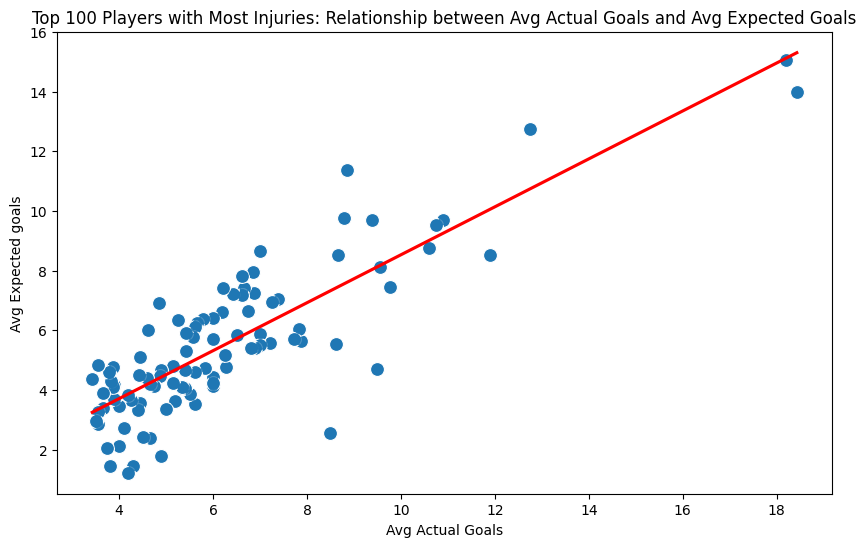

In [37]:
# Visualize the relationship between the average actual goals (Gls) and the average expected goals (xG) for the top 100 players.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gls', y='xG', data=avg_gls_and_avg_xg, s=100)
sns.regplot(data=avg_gls_and_avg_xg, x="Gls", y="xG", ci=None, line_kws=dict(color="r"))

plt.title('Top 100 Players with Most Injuries: Relationship between Avg Actual Goals and Avg Expected Goals')
plt.xlabel('Avg Actual Goals')
plt.ylabel('Avg Expected goals')

plt.show()

- It can be observed that among the top 100 players with the highest average goals scored across seasons, there is a correlation between actual goals scored and predicted goals.
- The higher the predicted goals for players, the higher the actual goals.
- This demonstrates the reliability of the prediction results.

## Question 6

**A possible question is:** What is the distribution of goals scored by players across different positions in the dataset?

**Answering this question will** help us understand how goals are spread across various playing positions.

**How we answer this question:** Create a breakdown of the number of goals scored (Gls - Goals scored or allowed) by players for each position.

### Reprocessing

In [38]:
# Retrieve Season','Position' and 'Gls' data
pos_and_gls_df = df[['Season','Position', 'Gls']]
pos_and_gls_df

,Season,Position,Gls
0,2018-2019,DF,0
1,2019-2020,DF,0
2,2020-2021,DF,1
3,2020-2021,DF,0
4,2021-2022,DF,0
...,...,...,...
4566,2019-2020,DF,2
4567,2020-2021,DF,0
4568,2021-2022,DF,4
4569,2022-2023,DF,3


In [39]:
# Drop duplicated rows and drop irrelevant column
pos_and_gls_df = pos_and_gls_df.drop_duplicates().drop(columns='Season')
pos_and_gls_df

,Position,Gls
0,DF,0
1,DF,0
2,DF,1
3,DF,0
4,DF,0
...,...,...
3960,DF,6
3990,DF,3
4038,FW,0
4146,MF,4


In [40]:
# Calculate average goals (Gls) for each position. 
gls_by_pos = pos_and_gls_df.groupby('Position').mean()
gls_by_pos

,Gls
Position,
DF,4.611765
FW,9.936782
MF,5.136842


### Analyzing to get the answer

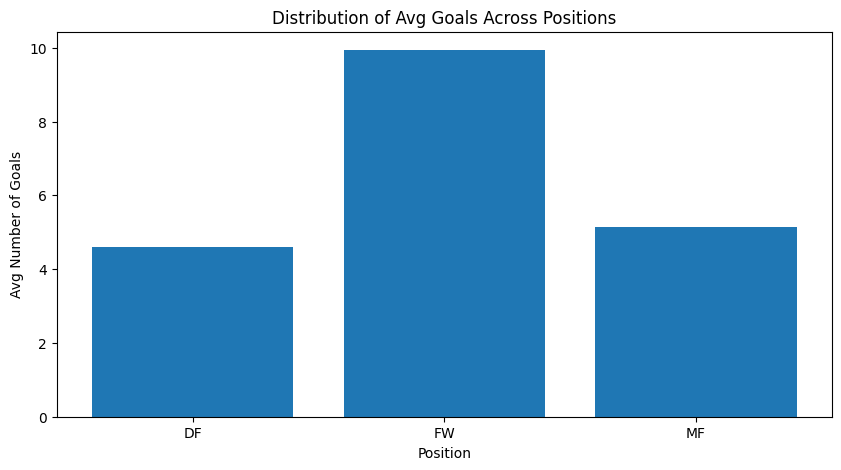

In [41]:
# Visualize the distribution of avg goals by position
plt.figure(figsize=(10, 5))

plt.bar(gls_by_pos.index, gls_by_pos['Gls'])
plt.xticks(rotation=0)
plt.title('Distribution of Avg Goals Across Positions')
plt.xlabel('Position')
plt.ylabel('Avg Number of Goals')

plt.show()

- It can be observed that the position with the highest average goals scored is FW (Forward), which is twice as much as DF (Defender) and MF (Midfielder).
- Both DF and MF positions have similar and lower average goals compared to the FW position.

## Question 7

**A possible question is:** How does the number of injuries vary across player positions?

**Answering this question will** help us understand if there are differences in the injury rates based on player positions.

**How we answer this question:** Analyze and aggregate the number of injuries for each playing position.

### Preprocessing

In [42]:
# Retrieve Postion and Injury data (where Injury is not nan)
injury_and_pos_df = df[df['Injury'].notna()][['Position', 'Injury']]
injury_and_pos_df

,Position,Injury
0,DF,Hamstring injury
1,DF,Metatarsal fracture
5,DF,Back injury
6,DF,Toe injury
10,DF,Ill
...,...,...
4558,FW,Hamstring injury
4559,FW,Knock
4560,FW,Knock
4562,FW,Hamstring injury


In [43]:
# Count the number of injuries by Position
count_injury_by_pos_df = injury_and_pos_df.groupby('Position').count()
count_injury_by_pos_df

,Injury
Position,
DF,1213
FW,966
MF,422


In [44]:
# Count the number of injuries for the top 5 injury types that players encounter the most
count_injury_by_type_df = injury_and_pos_df.value_counts()[:9]
count_injury_by_type_df = count_injury_by_type_df.reset_index(name='Count')
pivot_data = count_injury_by_type_df.pivot(index='Position', columns='Injury', values='Count').fillna(0)
pivot_data

Injury,Ankle injury,Hamstring injury,Knee injury,Knock,Muscle injury
Position,,,,,
DF,81.0,146.0,66.0,96.0,49.0
FW,70.0,132.0,54.0,65.0,0.0


### Analyzing to get the answer

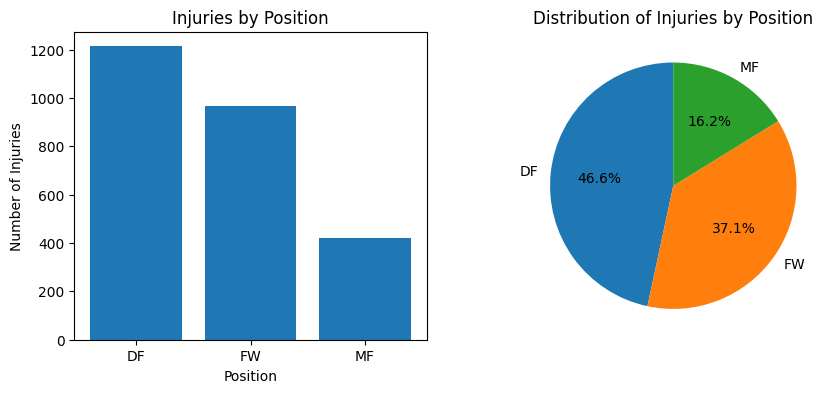

In [45]:
# Visualize the count and distribution of injuries among different player positions
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].bar(count_injury_by_pos_df.index, count_injury_by_pos_df['Injury'])
axes[0].set_title('Injuries by Position')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Number of Injuries')

axes[1].pie(count_injury_by_pos_df['Injury'], labels = count_injury_by_pos_df.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Injuries by Position')
plt.show()

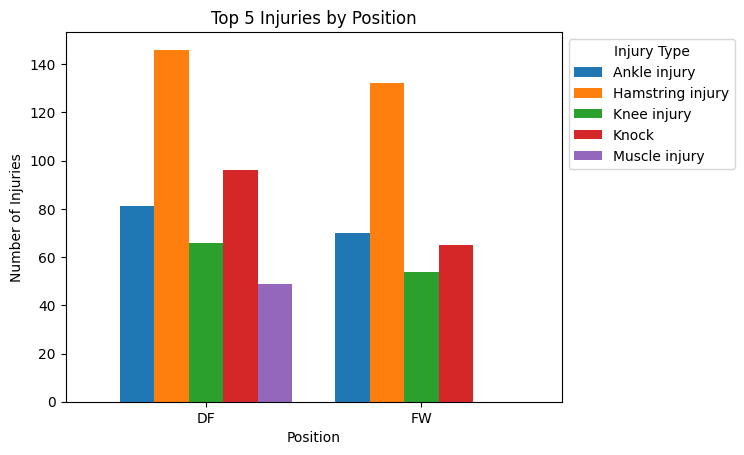

In [46]:
# Visualize the top 5 injuries by position by a pivot table
pivot_data.plot(kind='bar', width=0.8)
plt.title('Top 5 Injuries by Position')
plt.xlabel('Position')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)  
plt.legend(title='Injury Type', bbox_to_anchor=(1, 1))
plt.show()

- It can be observed that the position with the highest injury frequency is the DF (Defender) position, accounting for 46.6%, followed by the FW (Forward) position at 37.1%, and the lowest is the MF (Midfielder) position, representing 16.2%.
- Among the top 5 most frequent types of injuries experienced by players, including Ankle injury, Hamstring injury, Knee injury, Knock, and Muscle injury, only two positions, DF and FW, experience the highest number of injuries in the top 5. It can be noted that Hamstring injury is the most common type of injury among players, affecting more than 120 players, while the other types of injuries fluctuate around 60-70 players.

## Question 8

**A possible question is:** How many times have the top 100 players with the most minutes played experienced injuries?

**Answering this question will** Understand the overall injury frequency for the highest-minutes players.

**How we answer this question:** Collect and calculate average the injury occurrences for each player in the top 100 highest-minutes players.

### Preprocessing

In [47]:
# Retrieves the count of injuries for each player in each season
df_injury = df.groupby(['Name', 'Season'])['Injury'].count().reset_index()
# Get average number of injury of each player
df_injury = df_injury[['Name', 'Injury']].groupby('Name').mean()
df_injury

,Injury
Name,
Aaron Cresswell,1.500000
Aaron Hickey,1.333333
Aaron Wan-Bissaka,0.000000
Abdoulaye Doucouré,0.444444
Adam Lallana,2.444444
...,...
Willy Boly,1.000000
Yasser Larouci,0.500000
Yoane Wissa,0.000000


In [48]:
# Retrieves the count of minutes of each player in each season
df_min = df[['Name', 'Season', 'Min']].drop_duplicates()[['Name', 'Min']]
# Get average minutes of each player
df_min = df_min.groupby('Name').mean()
df_min

,Min
Name,
Aaron Cresswell,2445.100000
Aaron Hickey,1372.333333
Aaron Wan-Bissaka,1937.857143
Abdoulaye Doucouré,2064.500000
Adam Lallana,986.000000
...,...
Willy Boly,1467.222222
Yasser Larouci,556.000000
Yoane Wissa,1450.600000


In [49]:
# Merge the dataframes on player name, sort by average injuries in descending order and select the top 100 players
merged_df = pd.merge(df_min, df_injury, on='Name').sort_values(by='Injury', ascending=False)[:100]
merged_df

,Min,Injury
Name,,
Reiss Nelson,336.200000,3.666667
Erling Haaland,1368.333333,3.428571
Chris Richards,645.200000,3.400000
Oleksandr Zinchenko,1116.600000,3.333333
Facundo Pellistri,511.000000,3.000000
...,...,...
Donny van de Beek,1031.900000,1.375000
Mason Mount,2132.000000,1.375000
Kai Havertz,1813.222222,1.375000


### Analyzing to get the answer

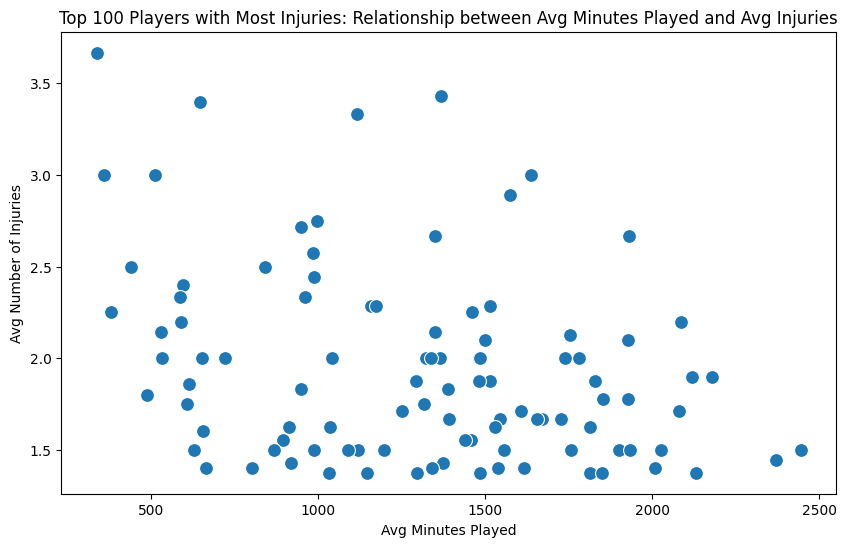

In [50]:
# Visualize the relationship between the average minutes played and the average number of injuries for the top 100 players with the most injuries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min', y='Injury', data=merged_df, s=100)

plt.title('Top 100 Players with Most Injuries: Relationship between Avg Minutes Played and Avg Injuries')
plt.xlabel('Avg Minutes Played')
plt.ylabel('Avg Number of Injuries')

plt.show()

- It can be observed that among the top 100 players with the highest average minutes played across seasons, there is truly no apparent correlation between the minutes played and the number of injuries for these players. In this dataset, it can be concluded that the minutes played do not significantly impact the frequency of injuries among the players.